In [1]:
import tensorflow as tf
import os
import stat
import random
import shutil
import cv2
import imghdr
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array,ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [26]:
data_dir = 'tensorflow_datasets/Sample'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'testing')

In [27]:
# Daftar nama kelas (nama folder)
class_names = os.listdir(train_dir)

# Membuat direktori untuk data latih dan data validasi
training_dir = 'path/to/train_directoryEksperiment'
validation_dir = 'path/to/valid_directoryEksperiment'
os.makedirs(training_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

# Pembagian data dengan rasio 80:20
for class_name in class_names:
    class_dir = os.path.join(train_dir, class_name)
    images = os.listdir(class_dir)
    random.shuffle(images)
    split_index = int(0.8 * len(images))
    
    training_images = images[:split_index]
    validation_images = images[split_index:]
    
    for image in training_images:
        src = os.path.join(class_dir, image)
        dst = os.path.join(training_dir, class_name, image)
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        shutil.copy(src, dst)
        
    for image in validation_images:
        src = os.path.join(class_dir, image)
        dst = os.path.join(validation_dir, class_name, image)
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        shutil.copy(src, dst)

In [28]:
# Menampilkan isi folder train
print('Isi folder train:')
for class_name in os.listdir(training_dir):
    class_dir = os.path.join(training_dir, class_name)
    print(f'Kelas: {class_name}, Jumlah gambar: {len(os.listdir(class_dir))}')

# Menampilkan isi folder validation
print('Isi folder validation:')
for class_name in os.listdir(validation_dir):
    class_dir = os.path.join(validation_dir, class_name)
    print(f'Kelas: {class_name}, Jumlah gambar: {len(os.listdir(class_dir))}')

Isi folder train:
Kelas: Acne, Jumlah gambar: 40
Kelas: Actinic Keratosis, Jumlah gambar: 40
Kelas: Basal Cell Carcinoma, Jumlah gambar: 40
Kelas: Eczemaa, Jumlah gambar: 40
Kelas: Rosacea, Jumlah gambar: 40
Isi folder validation:
Kelas: Acne, Jumlah gambar: 10
Kelas: Actinic Keratosis, Jumlah gambar: 10
Kelas: Basal Cell Carcinoma, Jumlah gambar: 10
Kelas: Eczemaa, Jumlah gambar: 10
Kelas: Rosacea, Jumlah gambar: 10


TRAIN DAN VALIDATION

In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definisikan objek ImageDataGenerator untuk normalisasi gambar
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Buat dataset dari direktori menggunakan ImageDataGenerator
train_generator = datagen.flow_from_directory(
    training_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',  # Klasifikasi multiclass
    shuffle=True
)
valid_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',  # Klasifikasi multiclass
    shuffle=True
)

Found 200 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definisikan objek ImageDataGenerator untuk normalisasi gambar
datagen_augmented = ImageDataGenerator(rescale=1.0/255.0,
                            rotation_range=40,  # Rentang rotasi antara -20 hingga +20 derajat
                            width_shift_range=0.2,  # Rentang pergeseran horizontal
                            height_shift_range=0.2,  # Rentang pergeseran vertikal
                            shear_range=0.2,  # Rentang pergeseran shear
                            zoom_range=0.2,  # Rentang perbesaran atau perkecilan
                            horizontal_flip=True,  # Flip horizontal
                            fill_mode='nearest')

# Buat dataset dari direktori menggunakan ImageDataGenerator
train_augmented_generator = datagen_augmented.flow_from_directory(
    training_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',  # Klasifikasi multiclass
    shuffle=True
)
valid_augmented_generator = datagen_augmented.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',  # Klasifikasi multiclass
    shuffle=True
)

Found 200 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


In [31]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), strides=1, activation="relu", input_shape=(128, 128, 3)))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(16, (3, 3), strides=1, activation="relu"))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(8, (3, 3), strides=1, activation="relu"))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    
    model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
    return model

In [32]:
model = create_model()
model_augmented = create_model()

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 16)        4624      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 8)         1160      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 8)       

In [34]:
# tanpa augmentasi
history = model.fit(
    train_generator,
    validation_data=(valid_generator),
    epochs=20,
    batch_size=32,
    steps_per_epoch=len(train_generator),
    validation_steps=len(valid_generator)
)

Epoch 1/20
7/7 [==============================] - 6s 748ms/step - loss: 1.6175 - accuracy: 0.1350 - val_loss: 1.6084 - val_accuracy: 0.2200
Epoch 2/20
7/7 [==============================] - 3s 516ms/step - loss: 1.6195 - accuracy: 0.1900 - val_loss: 1.6077 - val_accuracy: 0.2000
Epoch 3/20
7/7 [==============================] - 3s 453ms/step - loss: 1.6082 - accuracy: 0.2150 - val_loss: 1.6057 - val_accuracy: 0.2000
Epoch 4/20
7/7 [==============================] - 3s 457ms/step - loss: 1.6046 - accuracy: 0.2200 - val_loss: 1.5976 - val_accuracy: 0.2600
Epoch 5/20
7/7 [==============================] - 4s 499ms/step - loss: 1.5599 - accuracy: 0.3400 - val_loss: 1.5605 - val_accuracy: 0.3600
Epoch 6/20
7/7 [==============================] - 4s 490ms/step - loss: 1.4830 - accuracy: 0.3300 - val_loss: 1.5076 - val_accuracy: 0.3400
Epoch 7/20
7/7 [==============================] - 4s 498ms/step - loss: 1.3226 - accuracy: 0.4350 - val_loss: 1.5355 - val_accuracy: 0.3600
Epoch 8/20
7/7 [====

In [35]:
# dengan augmentasi
history_augmented = model_augmented.fit(
    train_augmented_generator,
    validation_data=(valid_augmented_generator),
    epochs=20,
    batch_size=32,
    steps_per_epoch=len(train_augmented_generator),
    validation_steps=len(valid_augmented_generator)
)

Epoch 1/20
7/7 [==============================] - 6s 708ms/step - loss: 1.6128 - accuracy: 0.1900 - val_loss: 1.6077 - val_accuracy: 0.2000
Epoch 2/20
7/7 [==============================] - 5s 690ms/step - loss: 1.6023 - accuracy: 0.2100 - val_loss: 1.6011 - val_accuracy: 0.2200
Epoch 3/20
7/7 [==============================] - 4s 701ms/step - loss: 1.5878 - accuracy: 0.3250 - val_loss: 1.6033 - val_accuracy: 0.2200
Epoch 4/20
7/7 [==============================] - 4s 596ms/step - loss: 1.5349 - accuracy: 0.2700 - val_loss: 1.5715 - val_accuracy: 0.2400
Epoch 5/20
7/7 [==============================] - 4s 597ms/step - loss: 1.5144 - accuracy: 0.2950 - val_loss: 1.5645 - val_accuracy: 0.2200
Epoch 6/20
7/7 [==============================] - 4s 576ms/step - loss: 1.4752 - accuracy: 0.3400 - val_loss: 1.5636 - val_accuracy: 0.2200
Epoch 7/20
7/7 [==============================] - 4s 593ms/step - loss: 1.4626 - accuracy: 0.2850 - val_loss: 1.5495 - val_accuracy: 0.2800
Epoch 8/20
7/7 [====

In [36]:
# Definisikan objek ImageDataGenerator untuk normalisasi gambar
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Buat dataset dari direktori menggunakan ImageDataGenerator
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',  # Klasifikasi multiclass
    shuffle=True)

Found 25 images belonging to 5 classes.


In [37]:
print("25 images test data:")
model.evaluate(test_generator)

25 images test data:
1/1 [==============================] - 0s 334ms/step - loss: 1.9306 - accuracy: 0.4000


[1.930578589439392, 0.4000000059604645]

In [38]:
print("25 images test data:")
model_augmented.evaluate(test_generator)

25 images test data:
1/1 [==============================] - 0s 261ms/step - loss: 1.9596 - accuracy: 0.2800


[1.9595927000045776, 0.2800000011920929]

In [39]:
# Memperoleh data untuk plot
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

train_acc_augmented = history_augmented.history['accuracy']
val_acc_augmented = history_augmented.history['val_accuracy']
train_loss_augmented = history_augmented.history['loss']
val_loss_augmented = history_augmented.history['val_loss']

epochs = range(1, len(train_acc)+1)

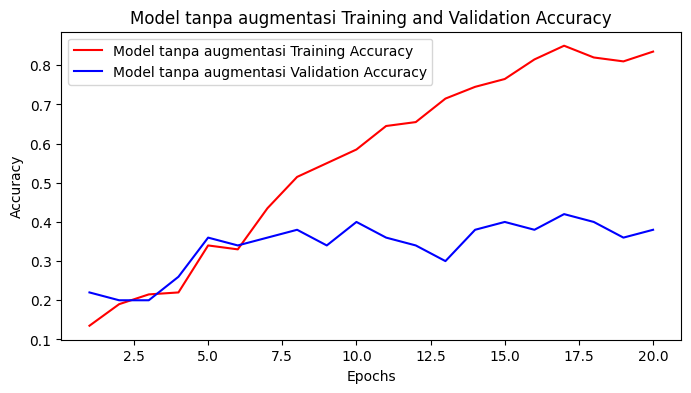

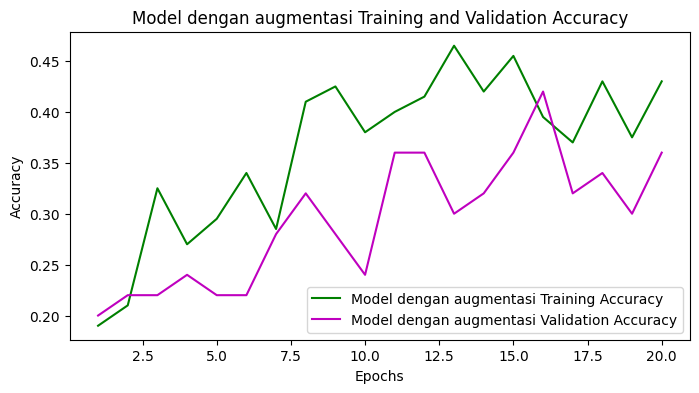

In [40]:
# Melakukan plotting untuk akurasi Model 1
plt.figure(figsize=(8, 4))
plt.plot(epochs, train_acc, 'r', label='Model tanpa augmentasi Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Model tanpa augmentasi Validation Accuracy')
plt.title('Model tanpa augmentasi Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Melakukan plotting untuk akurasi Model 2
plt.figure(figsize=(8, 4))
plt.plot(epochs, train_acc_augmented, 'g', label='Model dengan augmentasi Training Accuracy')
plt.plot(epochs, val_acc_augmented, 'm', label='Model dengan augmentasi Validation Accuracy')
plt.title('Model dengan augmentasi Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

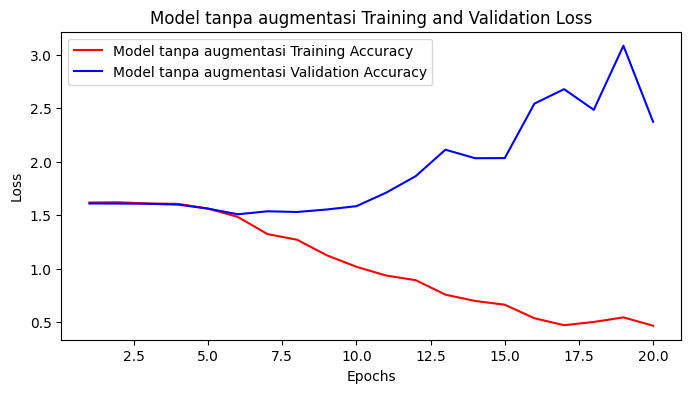

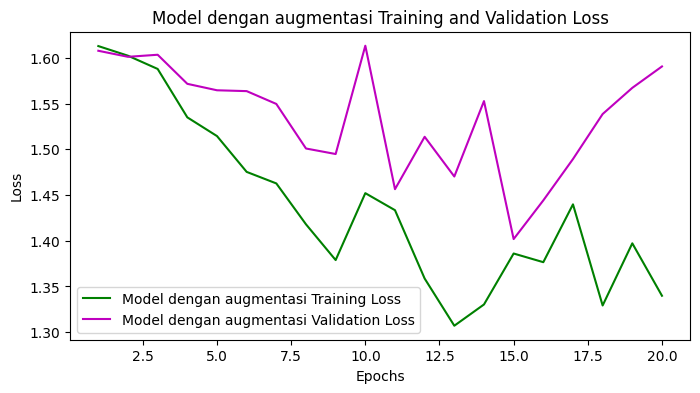

In [46]:
# Melakukan plotting untuk akurasi Model 1
plt.figure(figsize=(8, 4))
plt.plot(epochs, train_loss, 'r', label='Model tanpa augmentasi Training Accuracy')
plt.plot(epochs, val_loss, 'b', label='Model tanpa augmentasi Validation Accuracy')
plt.title('Model tanpa augmentasi Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Melakukan plotting untuk akurasi Model 2
plt.figure(figsize=(8, 4))
plt.plot(epochs, train_loss_augmented, 'g', label='Model dengan augmentasi Training Loss')
plt.plot(epochs, val_loss_augmented, 'm', label='Model dengan augmentasi Validation Loss')
plt.title('Model dengan augmentasi Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [42]:
# evaluasi metric tanpa augmentasi
# from sklearn.metrics import classification_report
# classs = ['Acne', 'Actinic Keratosis', 'Basal Cell Carcinoma', 'Eczema', 'Rosacea']

# # Prediksi pada data validation
# predictions = model.predict(test_generator)

# # Label sebenarnya dari generator
# target = test_generator.labels

# # Mengubah hasil prediksi menjadi bentuk kelas
# predicted_classes = np.argmax(predictions, axis=1)

# # Menampilkan laporan klasifikasi
# report = classification_report(target, predicted_classes, target_names=classs, zero_division=1.0)
# print(report)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

classs = ['Acne', 'Actinic Keratosis', 'Basal Cell Carcinoma', 'Eczema', 'Rosacea']

# Prediksi pada data validation
predictions = model.predict(test_generator)

# Label sebenarnya dari generator
target = test_generator.labels

# Mengubah hasil prediksi menjadi bentuk kelas
predicted_classes = np.argmax(predictions, axis=1)

# Menghitung metrik individual
accuracy = accuracy_score(target, predicted_classes)
precision = precision_score(target, predicted_classes, average='macro')
recall = recall_score(target, predicted_classes, average='macro')
f1 = f1_score(target, predicted_classes, average='macro')

# Menampilkan metrik
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

1/1 [==============================] - 0s 353ms/step
Accuracy: 0.12
Precision: 0.12
Recall: 0.12000000000000002
F1-score: 0.11555555555555556


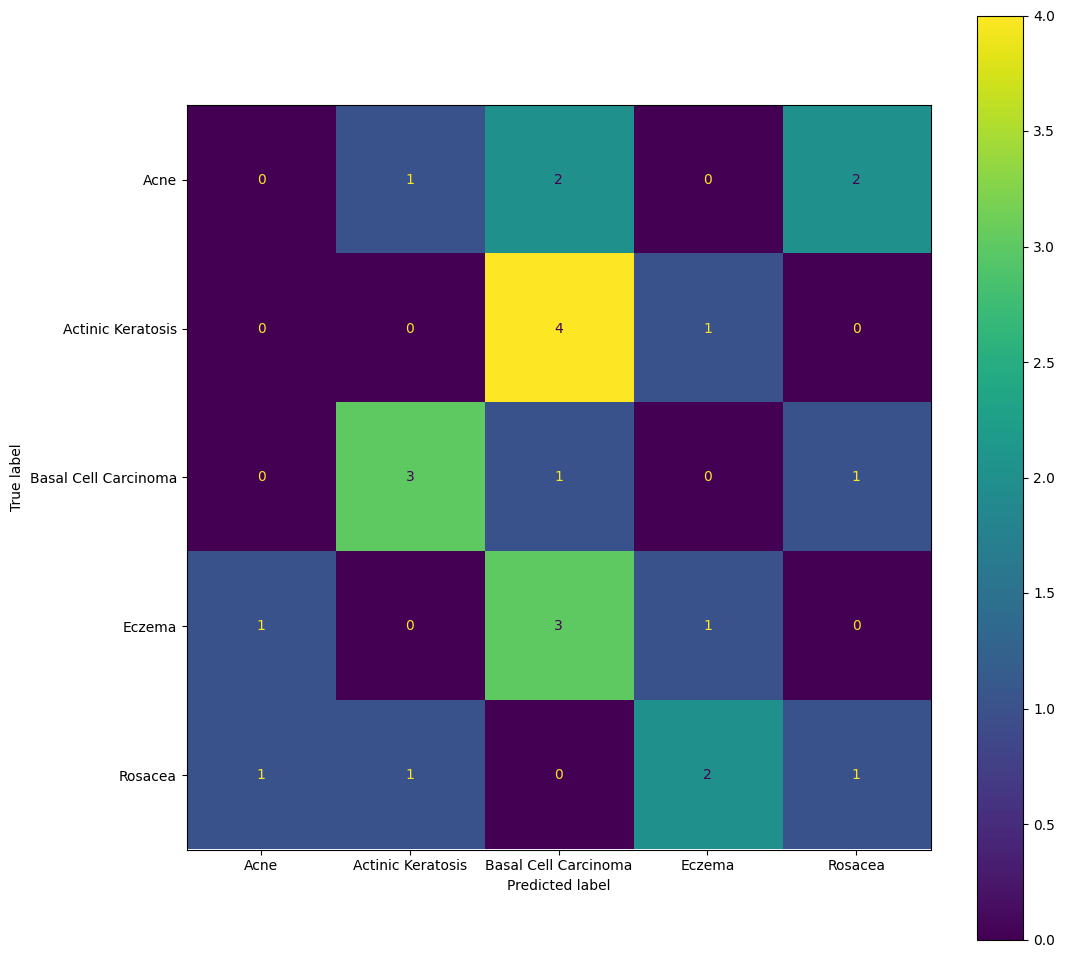

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(12,12))
ConfusionMatrixDisplay.from_predictions(target, predicted_classes,ax=ax ,display_labels = classs)
plt.show()

In [44]:
# evaluasi metric dengan augmentasi
# from sklearn.metrics import classification_report
# classs = ['Acne', 'Actinic Keratosis', 'Basal Cell Carcinoma', 'Eczema', 'Rosacea']

# # Prediksi pada data validation
# predictions = model_augmented.predict(test_generator)

# # Label sebenarnya dari generator
# target = test_generator.labels

# # Mengubah hasil prediksi menjadi bentuk kelas
# predicted_classes = np.argmax(predictions, axis=1)

# # Menampilkan laporan klasifikasi
# report = classification_report(target, predicted_classes, target_names=classs, zero_division=1.0)
# print(report)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

classs = ['Acne', 'Actinic Keratosis', 'Basal Cell Carcinoma', 'Eczema', 'Rosacea']

# Prediksi pada data validation
predictions = model_augmented.predict(test_generator)

# Label sebenarnya dari generator
target = test_generator.labels

# Mengubah hasil prediksi menjadi bentuk kelas
predicted_classes = np.argmax(predictions, axis=1)

# Menghitung metrik individual
accuracy = accuracy_score(target, predicted_classes)
precision = precision_score(target, predicted_classes, average='macro', zero_division=1.0)
recall = recall_score(target, predicted_classes, average='macro', zero_division=1.0)
f1 = f1_score(target, predicted_classes, average='macro', zero_division=1.0)

# Menampilkan metrik
print('testing using 25 images:')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

1/1 [==============================] - 0s 399ms/step
testing using 25 images:
Accuracy: 0.36
Precision: 0.6421568627450981
Recall: 0.36
F1-score: 0.3020202020202021


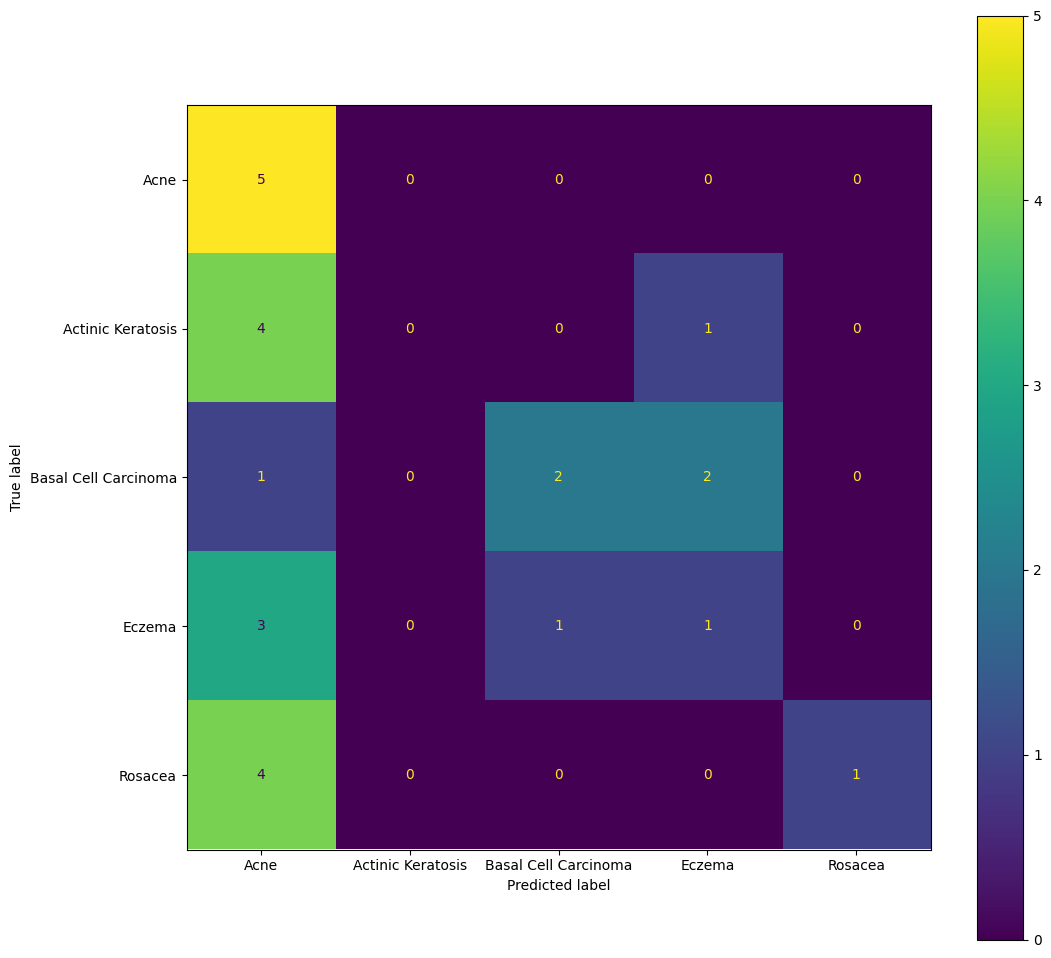

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(12,12))
ConfusionMatrixDisplay.from_predictions(target, predicted_classes,ax=ax ,display_labels = classs)
plt.show()

TEST DATA BARU

1/1 [==============================] - 0s 133ms/step


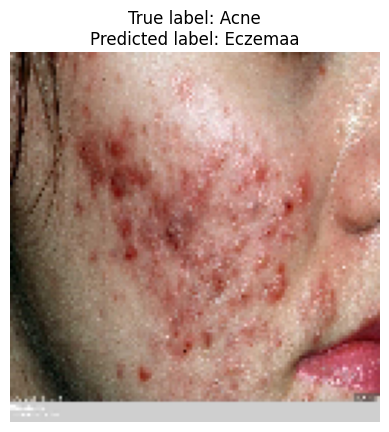

1/1 [==============================] - 0s 32ms/step


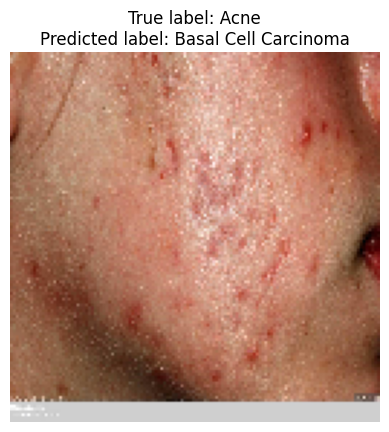

1/1 [==============================] - 0s 34ms/step


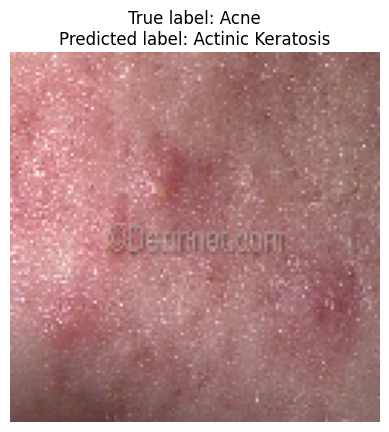

1/1 [==============================] - 0s 37ms/step


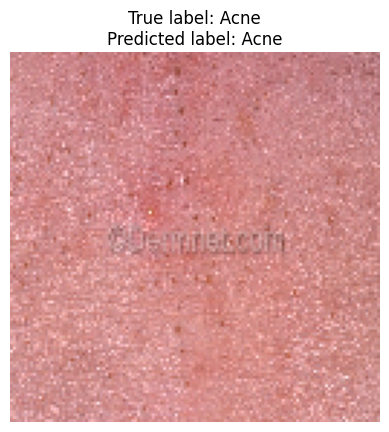

1/1 [==============================] - 0s 35ms/step


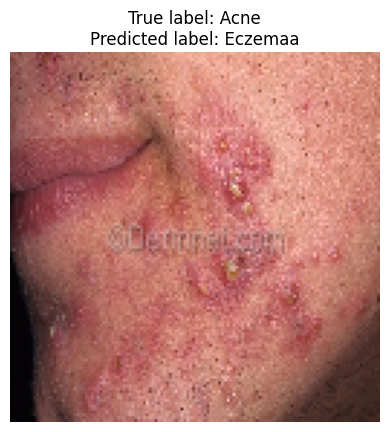

In [24]:
import os

# Path folder gambar
folder_path = 'tensorflow_datasets/Sample/testing/Acne'
# Map index to class name
class_names = os.listdir(test_dir)

# Loop melalui setiap file gambar dalam folder
for file_name in os.listdir(folder_path):
    # Path file gambar
    img_path = os.path.join(folder_path, file_name)
    # Load image
    img = load_img(img_path, target_size=(128, 128))
    imgplot = plt.imshow(img)
    true_label = class_names[0]
    img_array = img_to_array(img)
    batch_img = np.expand_dims(img_array, axis=0)
    # Make prediction
    prediction = model.predict(batch_img)
    # Get the predicted class index
    predicted_class_index = prediction.argmax(axis=-1)[0]
    predicted_class_name = class_names[predicted_class_index]

    # Plot image with true and predicted labels
    plt.imshow(img_array.astype(np.uint8))
    plt.title(f'True label: {true_label}\nPredicted label: {predicted_class_name}')
    plt.axis('off')
    plt.show()


1/1 [==============================] - 0s 122ms/step


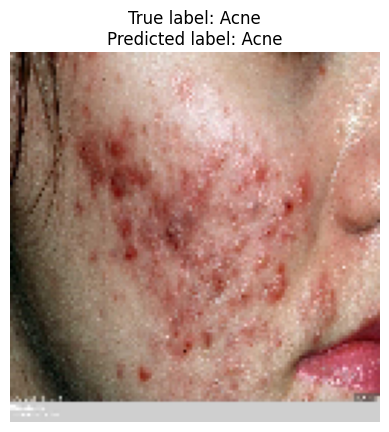

1/1 [==============================] - 0s 35ms/step


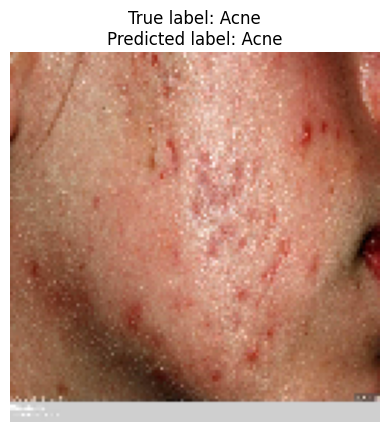

1/1 [==============================] - 0s 35ms/step


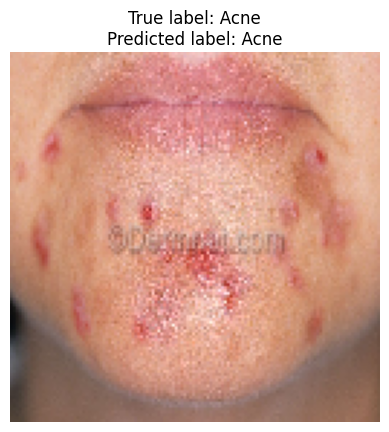

1/1 [==============================] - 0s 30ms/step


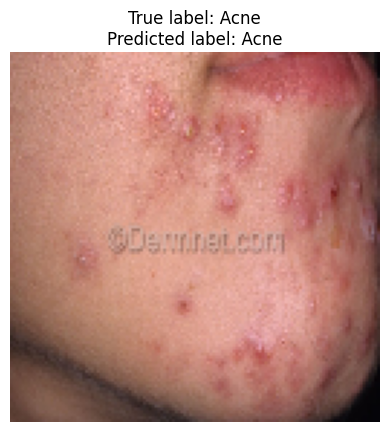

1/1 [==============================] - 0s 33ms/step


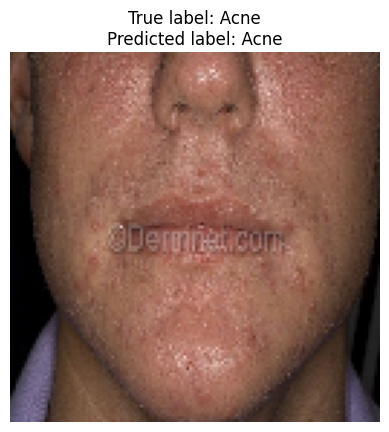

In [25]:
import os

# Path folder gambar
folder_path = 'tensorflow_datasets/DATA/Sample test/Acne'
# Map index to class name
class_names = os.listdir(test_dir)

# Loop melalui setiap file gambar dalam folder
for file_name in os.listdir(folder_path):
    # Path file gambar
    img_path = os.path.join(folder_path, file_name)
    # Load image
    img = load_img(img_path, target_size=(128, 128))
    imgplot = plt.imshow(img)
    true_label = class_names[0]
    img_array = img_to_array(img)
    batch_img = np.expand_dims(img_array, axis=0)
    # Make prediction
    prediction = model_augmented.predict(batch_img)
    # Get the predicted class index
    predicted_class_index = prediction.argmax(axis=-1)[0]
    predicted_class_name = class_names[predicted_class_index]

    # Plot image with true and predicted labels
    plt.imshow(img_array.astype(np.uint8))
    plt.title(f'True label: {true_label}\nPredicted label: {predicted_class_name}')
    plt.axis('off')
    plt.show()


In [62]:
model.save('sample_tanpa_augmentasi.h5')

In [63]:
model_augmented.save('sample_dengan_augmentasi.h5')